# Pythonチャレンジ: 地震データを探る

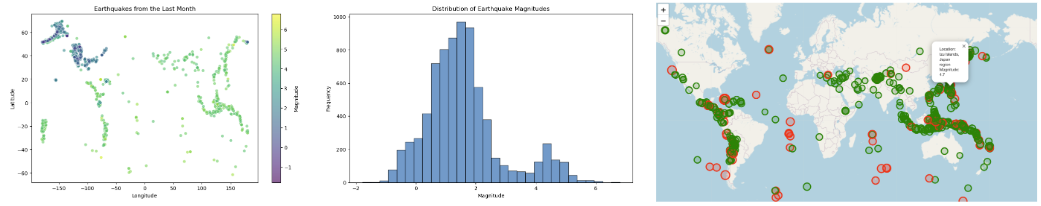

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [2]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-18T13:54:18.260Z,33.987000,-116.403336,1.9200,1.608776,ml,53.0,47.0,0.046420,0.17,...,2025-11-18T13:56:20.322Z,"10 km ENE of Desert Hot Springs, CA",earthquake,0.230000,0.440000,0.263699,24.0,automatic,ci,ci
1,2025-11-18T13:46:40.477Z,31.053000,-103.347000,6.5956,1.600000,ml,20.0,64.0,0.100000,0.60,...,2025-11-18T13:51:24.834Z,"34 km SW of Coyanosa, Texas",earthquake,0.000000,2.141621,0.100000,16.0,automatic,tx,tx
2,2025-11-18T13:15:49.620Z,38.808666,-122.816833,2.8600,1.090000,md,20.0,57.0,0.009647,0.02,...,2025-11-18T13:32:18.380Z,"6 km WNW of The Geysers, CA",earthquake,0.240000,0.470000,0.120000,20.0,automatic,nc,nc
3,2025-11-18T12:25:09.820Z,33.232334,-116.059830,3.2400,2.492809,ml,105.0,20.0,0.090450,0.22,...,2025-11-18T12:27:13.910Z,"12 km NE of Ocotillo Wells, CA",earthquake,0.160000,0.500000,0.206035,26.0,automatic,ci,ci
4,2025-11-18T12:19:38.808Z,31.657000,-104.276000,7.1765,1.900000,ml,31.0,67.0,0.000000,0.10,...,2025-11-18T12:42:06.292Z,"58 km S of Whites City, New Mexico",earthquake,0.656141,0.835572,0.000000,7.0,reviewed,tx,tx


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

In [3]:
import pandas as pd
import requests

# --- データ取得 ---
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# --- CSVファイルに保存 ---
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# --- DataFrameとして読み込む ---
data = pd.read_csv('earthquakes.csv')

# --- 1. 地震の総数 ---
total_earthquakes = len(data)

# --- 2. 最大マグニチュードの地震 ---
max_mag_row = data.loc[data['mag'].idxmax()]  # 最大マグニチュードの行を取得
max_mag = max_mag_row['mag']
max_place = max_mag_row['place']
max_time = pd.to_datetime(max_mag_row['time'])  # ISO形式の時刻を読みやすく変換

# --- 3. 日本で発生した地震の数 ---
# 「place」列に 'Japan' を含むものをカウント
japan_earthquakes = data[data['place'].str.contains('Japan', case=False, na=False)]
num_japan = len(japan_earthquakes)

# --- 結果を表示 ---
print("=== 地震データレポート（過去1ヶ月） ===")
print(f"・地震の総数: {total_earthquakes} 件")
print(f"・最大マグニチュード: {max_mag}")
print(f"　発生場所: {max_place}")
print(f"　発生日時: {max_time}")
print(f"・日本で発生した地震の数: {num_japan} 件")


=== 地震データレポート（過去1ヶ月） ===
・地震の総数: 7409 件
・最大マグニチュード: 6.8
　発生場所: 126 km E of Yamada, Japan
　発生日時: 2025-11-09 08:03:37.808000+00:00
・日本で発生した地震の数: 96 件


**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


In [4]:
import pandas as pd
import requests

# --- USGSデータを取得 ---
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# --- CSVを保存 ---
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# --- DataFrameに読み込む ---
data = pd.read_csv('earthquakes.csv')

# --- マグニチュード6.0を超える地震をフィルタリング ---
important_eq = data[data['mag'] > 6.0]

# --- リストアップ ---
print("=== 重要な地震（マグニチュード6.0超） ===")
for index, row in important_eq.iterrows():
    place = row['place']
    mag = row['mag']
    time = pd.to_datetime(row['time'])
    print(f"場所: {place}\nマグニチュード: {mag}\n発生時刻: {time}\n---")

# --- 件数を表示 ---
print(f"\n重要な地震の総数: {len(important_eq)} 件")


=== 重要な地震（マグニチュード6.0超） ===
場所: 121 km E of Yamada, Japan
マグニチュード: 6.4
発生時刻: 2025-11-09 08:54:36.991000+00:00
---
場所: 126 km E of Yamada, Japan
マグニチュード: 6.8
発生時刻: 2025-11-09 08:03:37.808000+00:00
---
場所: 155 km SE of Petropavlovsk-Kamchatsky, Russia
マグニチュード: 6.1
発生時刻: 2025-11-03 08:44:43.471000+00:00
---
場所: 22 km WSW of Khulm, Afghanistan
マグニチュード: 6.3
発生時刻: 2025-11-02 20:29:02.028000+00:00
---
場所: Banda Sea
マグニチュード: 6.4
発生時刻: 2025-10-28 14:40:18.476000+00:00
---
場所: 161 km E of Beauséjour, Guadeloupe
マグニチュード: 6.5
発生時刻: 2025-10-27 12:38:40.405000+00:00
---
場所: 57 km NW of Pante Makasar, Timor Leste
マグニチュード: 6.2
発生時刻: 2025-10-26 17:04:25.617000+00:00
---

重要な地震の総数: 7 件


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


In [6]:
import pandas as pd

#データを直接USGSから取得,
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

#--- 1. 平均深度を計算 ---,
avg_depth = data['depth'].mean()

#--- 2. 深さごとの分類 ---,
shallow = data[data['depth'] < 70]        # 浅い地震
intermediate = data[(data['depth'] >= 70) & (data['depth'] <= 300)]  # 中間深度
deep = data[data['depth'] > 300]          # 深い地震

#--- 3. 結果を表示 ---,
print("=== 地震の深さ分析（過去1ヶ月） ===")
print(f"平均深度: {avg_depth:.2f} km\n")
print(f"浅い地震 (<70 km): {len(shallow)} 件")
print(f"中間深度地震 (70–300 km): {len(intermediate)} 件")
print(f"深い地震 (>300 km): {len(deep)} 件")

=== 地震の深さ分析（過去1ヶ月） ===
平均深度: 21.00 km

浅い地震 (<70 km): 6868 件
中間深度地震 (70–300 km): 488 件
深い地震 (>300 km): 56 件


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

In [9]:
import pandas as pd

#--- データ取得 ---
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

#--- 1. ISO8601形式をJST（日本時間）に変換 ---
data['time_jst'] = pd.to_datetime(data['time'], utc=True) + pd.Timedelta(hours=9)

#--- 2. 最も早い・最新の地震を取得 ---
earliest = data['time_jst'].min()
latest = data['time_jst'].max()

#--- 3. 結果を表示 ---
print("=== 地震の時間分析（過去1ヶ月） ===")
print(f"最も早い地震: {earliest}")
print(f"最新の地震: {latest}")

=== 地震の時間分析（過去1ヶ月） ===
最も早い地震: 2025-10-19 23:31:00.490000+00:00
最新の地震: 2025-11-18 23:07:39.540000+00:00


**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

C:\Users\gatai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gatai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gatai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gatai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

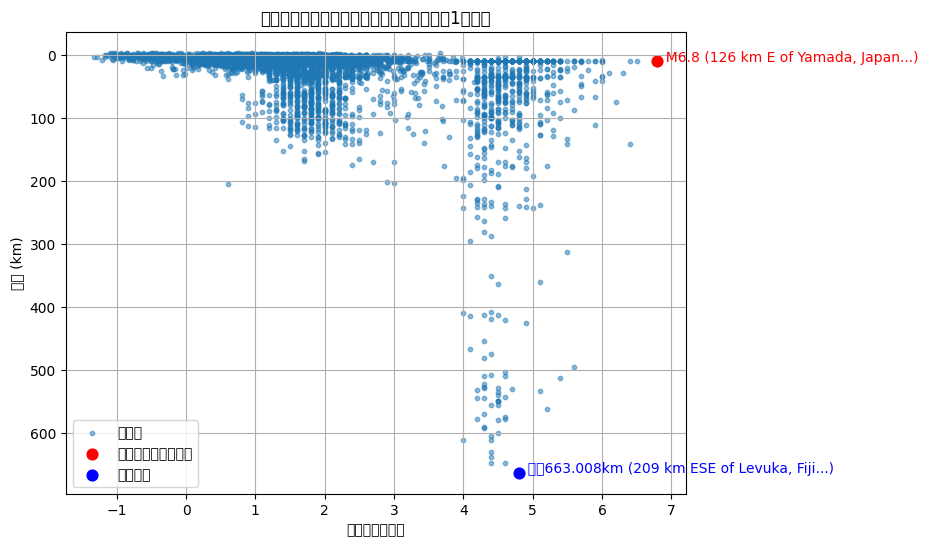

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#--- データ取得 ---,
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

#--- 欠損値を除去（安全のため） ---,
data = data.dropna(subset=['mag', 'depth'])

#--- 最大マグニチュードと最深地震を取得 ---,
max_mag_row = data.loc[data['mag'].idxmax()]
deepest_row = data.loc[data['depth'].idxmax()]

#--- 散布図を作成 ---,
plt.figure(figsize=(8,6))
plt.scatter(data['mag'], data['depth'], alpha=0.5, s=10, label="全地震")

#ラベルを追加,
plt.scatter(max_mag_row['mag'], max_mag_row['depth'], color='red', s=60, label='最大マグニチュード')
plt.scatter(deepest_row['mag'], deepest_row['depth'], color='blue', s=60, label='最深地震')

#ラベル文字を表示,
plt.text(max_mag_row['mag'], max_mag_row['depth'], f"  M{max_mag_row['mag']} ({max_mag_row['place'][:30]}...)", color='red')
plt.text(deepest_row['mag'], deepest_row['depth'], f"  深さ{deepest_row['depth']}km ({deepest_row['place'][:30]}...)", color='blue')

#軸ラベルとタイトル,
plt.xlabel("マグニチュード")
plt.ylabel("深さ (km)")
plt.title("地震のマグニチュードと深さの関係（過去1ヶ月）")
plt.legend()
plt.gca().invert_yaxis()  # 深い地震が下にくるよう反転
plt.grid(True)
plt.show()

**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**